<a href="https://colab.research.google.com/github/michaelojy85/mojy85.github.io/blob/master/StageB_Graded_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm

plt.rc('figure', figsize=(20,10)) #to make all my graphs the same size

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading UCI Machine Learning Repository: Energy efficiency Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df = pd.read_csv(url)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
'''
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â °C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional
'''
# Rename the columns of the dataset
columns_names = {'T1':'T_Kitchen', 'RH_1':'H_Kitchen', 
                 'T2':'T_LivingRoom', 'RH_2':'H_LivingRoom', 
                 'T3':'T_LaundryRoom', 'RH_3':'H_LaundryRoom', 
                 'T4':'T_OfficeRoom', 'RH_4':'H_OfficeRoom', 
                 'T5':'T_Bathroom', 'RH_5':'H_Bathroom', 
                 'T6':'T_OutBuilding', 'RH_6':'H_OutBuilding', 
                 'T7':'T_IronRoom', 'RH_7':'H_IronRoom', 
                 'T8':'T_TeenageRoom', 'RH_8':'H_TeenageRoom', 
                 'T9':'T_ParentRoom', 'RH_9':'H_ParentRoom', 
                 'To':'T_outside', 'RH_out':'H_outside',}
                  #Appliance is the target variable
df = df.rename(columns=columns_names)
df.describe()

,Appliances,lights,T_Kitchen,H_Kitchen,T_LivingRoom,H_LivingRoom,T_LaundryRoom,H_LaundryRoom,T_OfficeRoom,H_OfficeRoom,T_Bathroom,H_Bathroom,T_OutBuilding,H_OutBuilding,T_IronRoom,H_IronRoom,T_TeenageRoom,H_TeenageRoom,T_ParentRoom,H_ParentRoom,T_out,Press_mm_hg,H_outside,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [4]:
df.isnull().sum()

date             0
Appliances       0
lights           0
T_Kitchen        0
H_Kitchen        0
T_LivingRoom     0
H_LivingRoom     0
T_LaundryRoom    0
H_LaundryRoom    0
T_OfficeRoom     0
H_OfficeRoom     0
T_Bathroom       0
H_Bathroom       0
T_OutBuilding    0
H_OutBuilding    0
T_IronRoom       0
H_IronRoom       0
T_TeenageRoom    0
H_TeenageRoom    0
T_ParentRoom     0
H_ParentRoom     0
T_out            0
Press_mm_hg      0
H_outside        0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
dtype: int64

In [5]:
df.shape

(19735, 29)

In [6]:
# finding the correlation of the dataset
df.corr(method='pearson')

,Appliances,lights,T_Kitchen,H_Kitchen,T_LivingRoom,H_LivingRoom,T_LaundryRoom,H_LaundryRoom,T_OfficeRoom,H_OfficeRoom,T_Bathroom,H_Bathroom,T_OutBuilding,H_OutBuilding,T_IronRoom,H_IronRoom,T_TeenageRoom,H_TeenageRoom,T_ParentRoom,H_ParentRoom,T_out,Press_mm_hg,H_outside,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T_Kitchen,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
H_Kitchen,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T_LivingRoom,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
H_LivingRoom,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T_LaundryRoom,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
H_LaundryRoom,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T_OfficeRoom,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
H_OfficeRoom,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [7]:
x_cols = df.columns[2:]
y_cols = df.columns[1] # Appliance

In [8]:
x = sm.add_constant(df[x_cols])
est = sm.OLS(df[y_cols], x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:45:52   Log-Likelihood:            -1.1760e+05
No. Observations:               19735   AIC:                         2.353e+05
Df Residuals:                   19708   BIC:                         2.355e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            50.2084     94.593      0.531      0.596    -135.203     235.619
lights            1.9897      0.095     20.873      0.000       1.803       2.177
T_Kitchen        -0.6037      1.843     -0.328      0.743      -4.216       3.009
H_Kitchen        15.1536      0.670     22.617      0.000      13.840      16.467
T_LivingRoom    -17.7060      1.633    -10.840      0.000     -20.908     -14.504
H_LivingRoom    -13.4806      0.767    -17.568      0.000     -14.985     -11.977
T_LaundryRoom    25.4064      1.052     24.150      0.000      23.344      27.468
H_LaundryRoom     4.9246      0.675      7.300      0.000       3.602       6.247
T_OfficeRoom     -3.4653      1.024     -3.382      0.001      -5.473      -1.457
H_OfficeRoom     -0.1789      0.636     -0.281      0.779      -1.426       1.068
T_Bathroom       -0.0278      1.173     -0.024      0.981      -2.327       2.272
H_Bathroom        0.1410      0.087      1.623      0.105      -0.029       0.311
T_OutBuilding     7.1262      0.634     11.241      0.000       5.884       8.369
H_OutBuilding     0.2879      0.068      4.251      0.000       0.155       0.421
T_IronRoom        1.7946      1.323      1.356      0.175      -0.799       4.388
H_IronRoom       -1.5497      0.429     -3.609      0.000      -2.391      -0.708
T_TeenageRoom     8.1466      0.968      8.415      0.000       6.249      10.044
H_TeenageRoom    -4.6697      0.373    -12.531      0.000      -5.400      -3.939
T_ParentRoom    -15.8724      1.762     -9.010      0.000     -19.325     -12.420
H_ParentRoom     -0.9010      0.410     -2.200      0.028      -1.704      -0.098
T_out           -10.2282      1.521     -6.725      0.000     -13.209      -7.247
Press_mm_hg       0.1399      0.107      1.307      0.191      -0.070       0.350
H_outside        -1.0637      0.314     -3.385      0.001      -1.680      -0.448
Windspeed         1.7036      0.345      4.934      0.000       1.027       2.380
Visibility        0.1537      0.058      2.662      0.008       0.041       0.267
Tdewpoint         5.0488      1.477      3.419      0.001       2.155       7.943
rv1              -0.0208      0.023     -0.902      0.367      -0.066       0.024
rv2              -0.0208      0.023     -0.902      0.367      -0.066       0.024
==============================================================================
Omnibus:                    13976.729   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211473.983
Skew:                           3.326   Prob(JB):                         0.00
Kurtosis:                      17.592   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

In [9]:
df[y_cols].shape

(19735,)

In [10]:
df.lights.unique()

array([30, 40, 50, 70, 60, 10, 20,  0])

In [11]:
light_removed_cols = df.columns[3:] # remove light features from x_cols
new_features = df[light_removed_cols]

#PolynomialRegression(new_features, y_target, deg=10, reg=3)

In [12]:
# To create a linear regression model using sklearn to train the dataset 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

minMax = MinMaxScaler()
mormalised_df = df.copy().drop(columns=['date','lights'])
normalised_df = pd.DataFrame(minMax.fit_transform(mormalised_df), 
                             columns=mormalised_df.columns)
feature_df = normalised_df.drop(columns=['Appliances'])
appliance_target = normalised_df.Appliances

var_train, var_test, res_train, res_test = train_test_split(feature_df, 
                                       appliance_target, 
                                       test_size=0.3, random_state=42)

# single variable for simple regression model
X_feature = df[light_removed_cols] # features / X-values
y_target = df[y_cols] # targets / y-values



In [13]:
def TrainModel(features, targets, normalize=False):
    if normalize:
      scaler = MinMaxScaler()
      X_ = scaler.fit_transform(features)
    else:
      X_ = features

    return train_test_split(X_, targets, test_size=0.3, random_state=42)

In [14]:
from sklearn import metrics

def metricsCalculations(actual_test, predicted, n=3):
    # n = 3 round up in n decimal digits
    yt=np.array(actual_test)
    pv= np.array(predicted)

    # Mean Absolute Error
    mae = round(metrics.mean_absolute_error(actual_test, predicted), n) 
    # Residual Sum of Squares  
    rss = round(np.sum(np.square(yt - pv)), n)   
    # Mean Squared Error
    mse = round(metrics.mean_squared_error(actual_test, predicted), n) 
    # Root Mean Squared Error 
    rmse = round(np.sqrt(metrics.mean_squared_error(actual_test, predicted)), n)  
    # R-Squared 
    r2score = round(r2_score(actual_test, predicted), n)    

    print('Mean Absolute Error    :', mae)
    print('Residual Sum of Squares:', rss)  
    print('Mean Squared Error     :', mse)  
    print('Root Mean Squared Error:', rmse)
    print('R-Squared              :', r2score)

In [15]:
# A multiple linear regression function that will train the data, displaying regression plot and return y_test and y_pred
def MultipleLinearRegression(features, targets, normalizer=False, g_title=None):

    X_train, X_test, y_train, y_test = TrainModel(features, targets, 
                                                  normalize=normalizer)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)  # fit training data 

    y_pred = regressor.predict(X_test) # predicted y values

    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    ax = sns.regplot(x='Actual',y='Predicted', data=df_results,
                     scatter_kws={'alpha':0.5}) # regression plot
    
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Residual sum of square: {}".format(r2_score(y_test, y_pred))) # Residual sum of square
    print("Coefficient: {}".format(regressor.coef_)) #coefficient of the regression model

    return y_test, y_pred

In [16]:
def ResidualPlot(actual, predicted, title):
    residual_df = pd.DataFrame({'Actual':actual, 'Predict':predicted, 
                                'Residual':abs(actual)-abs(predicted)})
    sns.residplot(x=residual_df.index,  y=residual_df.Residual, 
                  scatter_kws={'alpha':0.5},
                  color="green").set_title(title)  # residual plot

In [17]:
 def residualDistribution(features, targets, title=None):
    OLS_model = sm.OLS(targets, features).fit()  # training the model
    predicted_values = OLS_model.predict()  # predicted values
    residual_values = OLS_model.resid
    sns.distplot(residual_values.T).set_title(title)

Residual sum of square: 0.14890246319303535
Coefficient: [-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


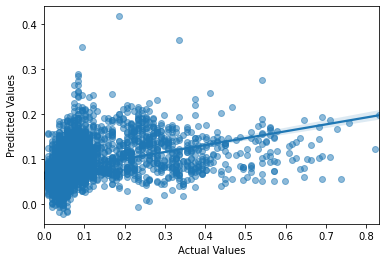

In [18]:
y_test, y_pred = MultipleLinearRegression(feature_df, 
                                          appliance_target,
                                          "Appliance Energy Data")  # actual dataset

In [19]:
metricsCalculations(y_test, y_pred, 5)

Mean Absolute Error    : 0.05013
Residual Sum of Squares: 45.34763
Mean Squared Error     : 0.00766
Root Mean Squared Error: 0.08751
R-Squared              : 0.1489


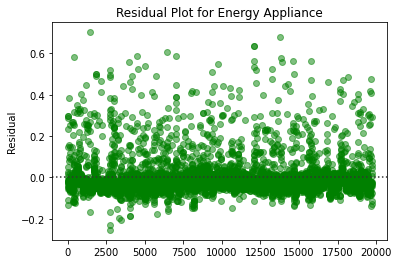

In [20]:
ResidualPlot(y_test, y_pred, "Residual Plot for Energy Appliance")

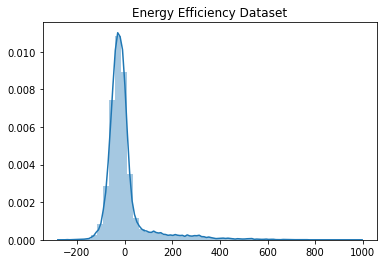

In [21]:
residualDistribution(X_feature, y_target, 
                     "Energy Efficiency Dataset") # actual dataset

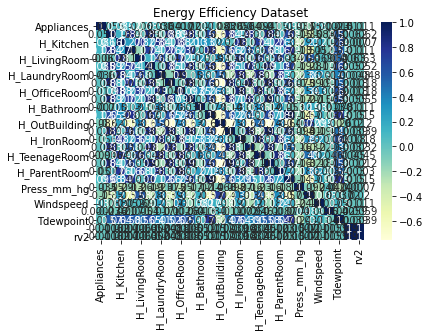

In [22]:
sns.heatmap(normalised_df.corr(method='pearson'), 
            annot=True, 
            cmap="YlGnBu").set_title("Energy Efficiency Dataset"); # colleration values (heatmap) of actual dataset

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

def RecursiveFeatureElimination(cols_x, cols_y, n=4):
  #Feature Selection
  model = ExtraTreesRegressor(criterion='mse')
  rfe = RFE(model, n)
  fit = rfe.fit(df[cols_x], df[cols_y])

  cols = []

  for boolean, col in zip(fit.support_, cols_x):
      if boolean:
          cols.append(col)

  print("Number of Features: ", fit.n_features_)
  print("Selected Features: ", fit.support_)
  print("Feature Ranking: ", fit.ranking_) 
  print("Selected Feature: ", cols)

  return cols

In [24]:
x_filtered_cols = RecursiveFeatureElimination(x_cols, y_cols, 15)

Number of Features:  15
Selected Features:  [False  True  True  True  True  True  True  True False False  True  True
  True False False  True  True False False False  True  True  True False
 False False False]
Feature Ranking:  [ 2  1  1  1  1  1  1  1  6  4  1  1  1  7  3  1  1  9  5 10  1  1  1 11
  8 13 12]
Selected Feature:  ['T_Kitchen', 'H_Kitchen', 'T_LivingRoom', 'H_LivingRoom', 'T_LaundryRoom', 'H_LaundryRoom', 'T_OfficeRoom', 'H_Bathroom', 'T_OutBuilding', 'H_OutBuilding', 'T_TeenageRoom', 'H_TeenageRoom', 'Press_mm_hg', 'H_outside', 'Windspeed']


Residual sum of square: 0.12947338165869526
Coefficient: [ 0.02291152  0.6430515  -0.28008647 -0.58786964  0.20993061  0.1066088
 -0.04980859  0.02673126  0.05832414  0.0417164   0.04500427 -0.20087138
  0.01191577  0.00990465  0.03104288]


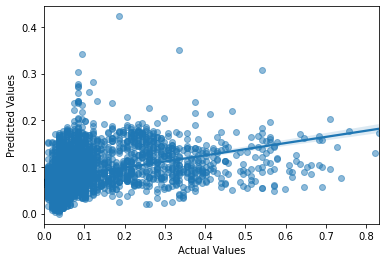

In [25]:
filtered_feature = normalised_df[x_filtered_cols]

filtered_test, filtered_pred = MultipleLinearRegression(filtered_feature, 
                                          appliance_target)  # actual dataset

In [26]:
var_train, var_test, res_train, res_test = TrainModel(filtered_feature, 
                                            appliance_target)  # actual dataset

regr = LinearRegression()  
regr.fit(var_train, res_train)  # fit training data 

predicted_values = regr.predict(var_test)

In [27]:
metricsCalculations(filtered_test, filtered_pred)

Mean Absolute Error    : 0.051
Residual Sum of Squares: 46.383
Mean Squared Error     : 0.008
Root Mean Squared Error: 0.089
R-Squared              : 0.129


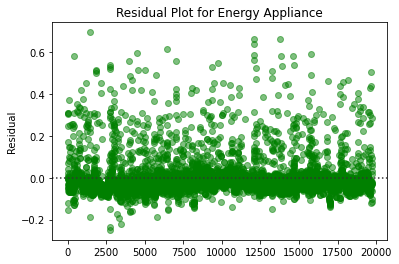

In [28]:
ResidualPlot(filtered_test, filtered_pred,
             "Residual Plot for Energy Appliance")

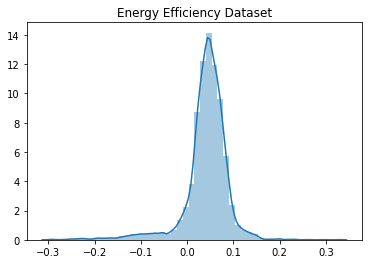

In [29]:
residualDistribution(filtered_test, filtered_pred, 
                     "Energy Efficiency Dataset") # actual dataset

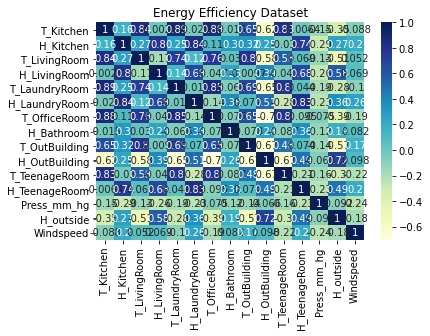

In [30]:
#x_filtered_cols.append(y_cols)
sns.heatmap(df[x_filtered_cols].corr(method='pearson'), 
            annot=True, 
            cmap="YlGnBu").set_title("Energy Efficiency Dataset"); # colleration values (heatmap) of actual dataset

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

# A polynomial regression function that will generate the SVR score and plot a regression plot
def PolynomialRegression(features, targets, kernel=None, deg=1, reg=1, g_title=None):

    X_train, X_test, y_train, y_test = TrainModel(features, targets, True)

    svr_score = 0 

    svm_poly_clf = svm.SVR(kernel=kernel, degree=deg, C=reg).fit(X_train, y_train)
    score = svm_poly_clf.score(X_test, y_test)

    if svr_score < score:
        svr_score, d, r = score, i, j

    y_pred = svm_poly_clf.predict(X_test) # predicted y values

    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    ax = sns.regplot(x='Actual',y='Predicted', scatter_kws={'alpha':0.5},
                     data=df_results, order=d) # regression plot
    
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Polynomial Degree: {}".format(d))
    print("Reguralizatin (C): {}".format(r))
    print("SVR Score: {}".format(svr_score))

In [32]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
mormalised_df = df.copy().drop(columns=['date','lights'])
normalised_df = pd.DataFrame(minMax.fit_transform(mormalised_df), columns=mormalised_df.columns)
feature_df = normalised_df.drop(columns=['Appliances'])
appliance_target = normalised_df.Appliances

var_train, var_test, res_train, res_test = train_test_split(feature_df, 
                                       appliance_target, 
                                       test_size=0.3, random_state=42)

regr = LinearRegression()  
regr.fit(var_train, res_train)  # fit training data 

predicted_values = regr.predict(var_test)

In [33]:
metricsCalculations(res_test, predicted_values)

Mean Absolute Error    : 0.05
Residual Sum of Squares: 45.348
Mean Squared Error     : 0.008
Root Mean Squared Error: 0.088
R-Squared              : 0.149


In [34]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(var_train, res_train)
# Root Mean Squared Error
round(np.sqrt(metrics.mean_squared_error(res_test, 
                                         lasso_reg.predict(var_test))), 4)   

0.0936

In [35]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(var_train, res_train)
# Root Mean Squared Error
round(np.sqrt(metrics.mean_squared_error(res_test, 
                                         ridge_reg.predict(var_test))), 4)   

0.0875

In [36]:
elasticNet_reg = ElasticNet(alpha=0.001)
elasticNet_reg.fit(var_train, res_train)
# Root Mean Squared Error
round(np.sqrt(metrics.mean_squared_error(res_test, 
                                         elasticNet_reg.predict(var_test))), 4)  

0.0912

In [37]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this fucntion returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(regr, var_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, var_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, var_train, 'Lasso_Weight')
elasticNet_weights_df = get_weights_df(elasticNet_reg, var_train, 'Elastic_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elasticNet_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight,Elastic_Weight
0,H_LivingRoom,-0.456698,-0.401134,-0.000000,-0.000000
1,T_out,-0.321860,-0.250765,0.000000,0.000000
2,T_LivingRoom,-0.236178,-0.193880,0.000000,0.021721
3,T_ParentRoom,-0.189941,-0.188584,-0.000000,-0.048044
4,H_TeenageRoom,-0.157595,-0.156596,-0.000110,-0.084407
5,H_outside,-0.077671,-0.050541,-0.049557,-0.038092
6,H_IronRoom,-0.044614,-0.046291,-0.000000,-0.002863
7,H_ParentRoom,-0.039800,-0.041701,-0.000000,-0.000000
8,T_Bathroom,-0.015657,-0.020727,-0.000000,-0.000000
9,T_Kitchen,-0.003281,-0.021549,0.000000,0.000000


In [38]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor

var_train1, var_test1, res_train1, res_test1 = TrainModel(filtered_feature, 
                                                          appliance_target)

rfr = RandomForestRegressor()

hyperparameters = {
    'bootstrap'         : [True],
    'criterion'         : ['mse', 'mae'],
    'max_depth'         : [80, 100, 120],
    'max_features'      : [6, 7, 8],
    'min_samples_leaf'  : [5, 6, 7],
    'min_samples_split' : [8, 10, 12],
    'n_estimators'      : [100, 300, 500]
}# Create a based model

random_search = RandomizedSearchCV(estimator = rfr, 
                                   param_distributions = hyperparameters, 
                                   cv = 3, n_jobs = -1, verbose = 2)
random_search.fit(var_train1, res_train1)

print("Best Estimator              : {}".format(random_search.best_estimator_))
print("Best Cross-Validation-Score : {}".format(random_search.best_score_))
print("Best Parameters             : {}".format(random_search.best_params_))
print("Best Index                  : {}".format(random_search.best_index_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 74.0min finished


Best Estimator              : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=120, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best Cross-Validation-Score : 0.4042093055262317
Best Parameters             : {'n_estimators': 300, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 120, 'criterion': 'mse', 'bootstrap': True}
Best Index                  : 6


In [ ]:
from sklearn.svm import SVR

svr_clf = SVR()

param_grid = {
    'kernel'    : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree'    : [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'C'         : [17, 18, 19, 20],
}# Create a based model

grid_search = GridSearchCV(estimator = svr_clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(var_train1, res_train1)

print("Best Estimator              : {}".format(grid_search.best_estimator_))
print("Best Cross-Validation-Score : {}".format(grid_search.best_score_))
print("Best Parameters             : {}".format(grid_search.best_params_))
print("Best Index                  : {}".format(grid_search.best_index_))

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min


In [ ]:
svr_clf.set_params(**grid_search.best_params_)
svr_clf.fit(var_train1, res_train1)
score = svr_clf.score(var_test1, res_test1)

res_pred1 = svr_clf.predict(var_test1) # predicted y values

df_results = pd.DataFrame({'Actual': res_test1, 'Predicted': res_pred1})

ax = sns.regplot(x='Actual',y='Predicted', scatter_kws={'alpha':0.5},
                data=df_results, order=grid_search.best_params_['degree']) # regression plot
    
ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    #ax.set_title(g_title) # set title

print("SVR Score: {}".format(score))